In [1]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.preprocessing as pr
# for plotting
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# make sure I can access datatools
import os
import sys
root_dir = '/Users/cerber/Projects/Lambo/ml/'
if root_dir not in sys.path:
    sys.path.append(root_dir)

In [3]:
df = pd.read_pickle('./data/raw_prices.pickle')
df = df.sort_values('Timestamp')
print(df.shape)
print(list(df))
unique = df['CMC_ID'].unique()
print(unique[:20])
print(len(unique))


(4876770, 5)
['CMC_ID', 'CC_USD_PRICE', 'CC_ETH_PRICE', 'CC_BTC_PRICE', 'Timestamp']
['FRST' 'RBIES' 'ASTRO' 'ENG' 'BRAT' 'WILD' 'CND' 'SPACE' 'BWK' 'KARMA'
 'RPC' 'SMART' 'REE' 'MYST' 'PIX' 'PSY' 'GBRC' 'CBD' 'LTH' 'HBT']
2006


In [ ]:
#dataset
dataset = {}

for i, uval in enumerate(unique):
    if i % 100 == 0: print(i)
    temp = df[df['CMC_ID'] == uval]
    shape = temp.shape
    if shape[0] > 20000:
        dataset[uval] = temp
    



In [ ]:
# saving values for future use
base_path = './data/coins/'
for key, val in dataset.items():
    val.to_pickle(base_path+key+'.df')

In [ ]:
# all coins with a significant amount of data
coin_names = dataset.keys()
print(coin_names)


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


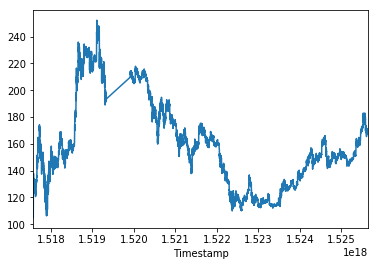

In [5]:
# coin_name = 'litecoin'
# coin_frame = dataset[coin_name]

# first, lets experiment with one coin
coin_frame = pd.read_pickle('./data/coins/' + 'litecoin.df')
sns.tsplot(data=coin_frame['CC_USD_PRICE'], time=coin_frame['Timestamp'])

In [6]:
# Making a time series dataset stationary; meaning the mean and the varience of the dataset have 
# to be indepndent of time (like 0).
coin_frame.describe()

,CC_USD_PRICE,CC_ETH_PRICE,CC_BTC_PRICE
count,24980.000000,24980.000000,24980.000000
mean,158.318460,0.250926,0.018030
std,32.097737,0.041065,0.001588
min,104.760000,0.136100,0.013620
25%,133.587500,0.227200,0.016790
50%,152.520000,0.250600,0.017940
75%,174.262500,0.288300,0.018920
max,252.180000,0.331000,0.024950


In [7]:
# logging helps us to associate multiplicative ideas with addition.
# Hence to model geometric growth as linear we would have to take a log of the USD price column

coin_frame['USD_PRICE_LN'] = coin_frame['CC_USD_PRICE'].apply(np.log)

In [8]:
# Now we observe that the standard deviation has nearly reached 0
coin_frame.describe()

,CC_USD_PRICE,CC_ETH_PRICE,CC_BTC_PRICE,USD_PRICE_LN
count,24980.000000,24980.000000,24980.000000,24980.000000
mean,158.318460,0.250926,0.018030,5.044939
std,32.097737,0.041065,0.001588,0.196648
min,104.760000,0.136100,0.013620,4.651672
25%,133.587500,0.227200,0.016790,4.894757
50%,152.520000,0.250600,0.017940,5.027296
75%,174.262500,0.288300,0.018920,5.160563
max,252.180000,0.331000,0.024950,5.530143


In [11]:
coin_frame['USD_PRICE_LN_DIFF'] = coin_frame.USD_PRICE_LN.diff()

In [12]:
coin_frame.describe()

,CC_USD_PRICE,CC_ETH_PRICE,CC_BTC_PRICE,USD_PRICE_LN,USD_PRICE_DIFF
count,24980.000000,24980.000000,24980.000000,24980.000000,24979.000000
mean,158.318460,0.250926,0.018030,5.044939,0.000017
std,32.097737,0.041065,0.001588,0.196648,0.004357
min,104.760000,0.136100,0.013620,4.651672,-0.045340
25%,133.587500,0.227200,0.016790,4.894757,-0.001509
50%,152.520000,0.250600,0.017940,5.027296,0.000000
75%,174.262500,0.288300,0.018920,5.160563,0.001511
max,252.180000,0.331000,0.024950,5.530143,0.085215


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


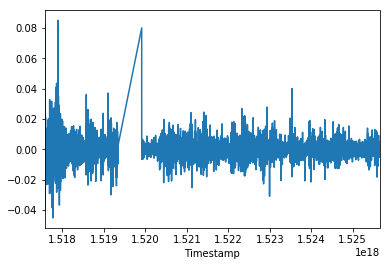

In [14]:
sns.tsplot(data=coin_frame['USD_PRICE_DIFF'], time=coin_frame['Timestamp'])

In [15]:
coin_frame.to_pickle('./data/coins/litecoin_stationirized.df')

In [17]:
# lets do it to them all now;

import os

base_path = './data/coins/'

for root, dirs, files in os.walk(base_path):
    for i, filename in enumerate(files):
        if i % 10 ==0: print("Working on the coin number "+i)
        coin_frame = pd.read_pickle(base_path+filename)
        coin_frame['USD_PRICE_LN'] = coin_frame['CC_USD_PRICE'].apply(np.log)
        coin_frame['USD_PRICE_LN_DIFF'] = coin_frame.USD_PRICE_LN.diff()
        coin_frame.to_pickle(base_path+filename[:-3]+'_stationarized.df')
        
        

Working on the coin number ${i}
Working on the coin number ${i}
Working on the coin number ${i}
Working on the coin number ${i}
Working on the coin number ${i}
Working on the coin number ${i}
Working on the coin number ${i}


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/algorithms.py:1547: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


Working on the coin number ${i}
Working on the coin number ${i}
Working on the coin number ${i}
Working on the coin number ${i}
Working on the coin number ${i}
Working on the coin number ${i}
Working on the coin number ${i}
Working on the coin number ${i}
Working on the coin number ${i}
